In [181]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = None

In [182]:
pd.set_option("display.max_column", None)
df = pd.read_excel('train.xlsx', sheet_name='Data 2')
df.head(10)

,user_id,event_timestamp,event_name,level_id,failed_count,level_score,move_made,star_achieved,level_time,streak_attempt,pools_used,pools_remaining,powerup_1_used,powerup_2_used,powerup_3_used,powerup_4_used,wild_card,undo,add_card,gold_used_in_level,playtime_active,current_gold,star_collected,point_range
0,2CF33134-2B19-474C-A472-3742A13B77AF,2020-04-15 00:37:38,level_complete,1,0,100,24,3,15,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,36,21175,3.0,NaN
1,2CF33134-2B19-474C-A472-3742A13B77AF,2020-04-15 00:38:13,level_complete,2,0,25,15,3,18,0,2,0,NaN,NaN,NaN,NaN,0,0,0,0,71,21414,6.0,NaN
2,2CF33134-2B19-474C-A472-3742A13B77AF,2020-04-15 00:38:50,level_complete,3,0,100,25,3,27,2,7,5,NaN,NaN,NaN,NaN,0,0,0,0,111,21551,9.0,NaN
3,25C2812D-3F25-4ADB-93C1-E36AD8C29FF9,2020-04-15 01:36:58,level_complete,1,0,100,24,3,22,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,30,21175,3.0,NaN
4,25C2812D-3F25-4ADB-93C1-E36AD8C29FF9,2020-04-15 01:37:37,level_complete,2,0,25,15,3,17,0,2,0,NaN,NaN,NaN,NaN,0,0,0,0,70,21414,6.0,NaN
5,25C2812D-3F25-4ADB-93C1-E36AD8C29FF9,2020-04-15 01:38:12,level_complete,3,0,100,24,3,25,2,6,6,NaN,NaN,NaN,NaN,0,0,0,0,105,21536,9.0,NaN
6,25C2812D-3F25-4ADB-93C1-E36AD8C29FF9,2020-04-15 01:39:20,level_complete,4,0,100,34,3,47,3,12,9,NaN,NaN,NaN,NaN,0,0,0,0,170,21588,12.0,NaN
7,25C2812D-3F25-4ADB-93C1-E36AD8C29FF9,2020-04-15 01:40:25,level_complete,5,0,97,35,2,38,1,16,1,NaN,NaN,NaN,NaN,0,0,0,0,236,23822,14.0,NaN
8,25C2812D-3F25-4ADB-93C1-E36AD8C29FF9,2020-04-15 01:41:37,level_complete,6,0,100,35,3,44,2,10,10,NaN,NaN,NaN,NaN,1,0,0,500,309,23366,17.0,NaN
9,25C2812D-3F25-4ADB-93C1-E36AD8C29FF9,2020-04-15 01:42:33,level_complete,7,0,100,33,3,40,2,12,8,NaN,NaN,NaN,NaN,0,0,0,0,364,23456,20.0,NaN


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1361 non-null   object        
 1   event_timestamp     1361 non-null   datetime64[ns]
 2   event_name          1361 non-null   object        
 3   level_id            1361 non-null   int64         
 4   failed_count        1361 non-null   int64         
 5   level_score         1361 non-null   int64         
 6   move_made           1361 non-null   int64         
 7   star_achieved       1361 non-null   int64         
 8   level_time          1361 non-null   int64         
 9   streak_attempt      1361 non-null   int64         
 10  pools_used          1361 non-null   int64         
 11  pools_remaining     1361 non-null   int64         
 12  powerup_1_used      900 non-null    float64       
 13  powerup_2_used      900 non-null    float64     

In [184]:
df.isnull().sum()
# powerup_1_used, powerup_2_used, powerup_3_used, powerup_4_used ada 461 kolom yang tidak ada data
# star_collected ada 900 kolom yang tidak ada data dan point_range 461 kolom yang tidak ada data

user_id                 0
event_timestamp         0
event_name              0
level_id                0
failed_count            0
level_score             0
move_made               0
star_achieved           0
level_time              0
streak_attempt          0
pools_used              0
pools_remaining         0
powerup_1_used        461
powerup_2_used        461
powerup_3_used        461
powerup_4_used        461
wild_card               0
undo                    0
add_card                0
gold_used_in_level      0
playtime_active         0
current_gold            0
star_collected        900
point_range           461
dtype: int64

<AxesSubplot:>

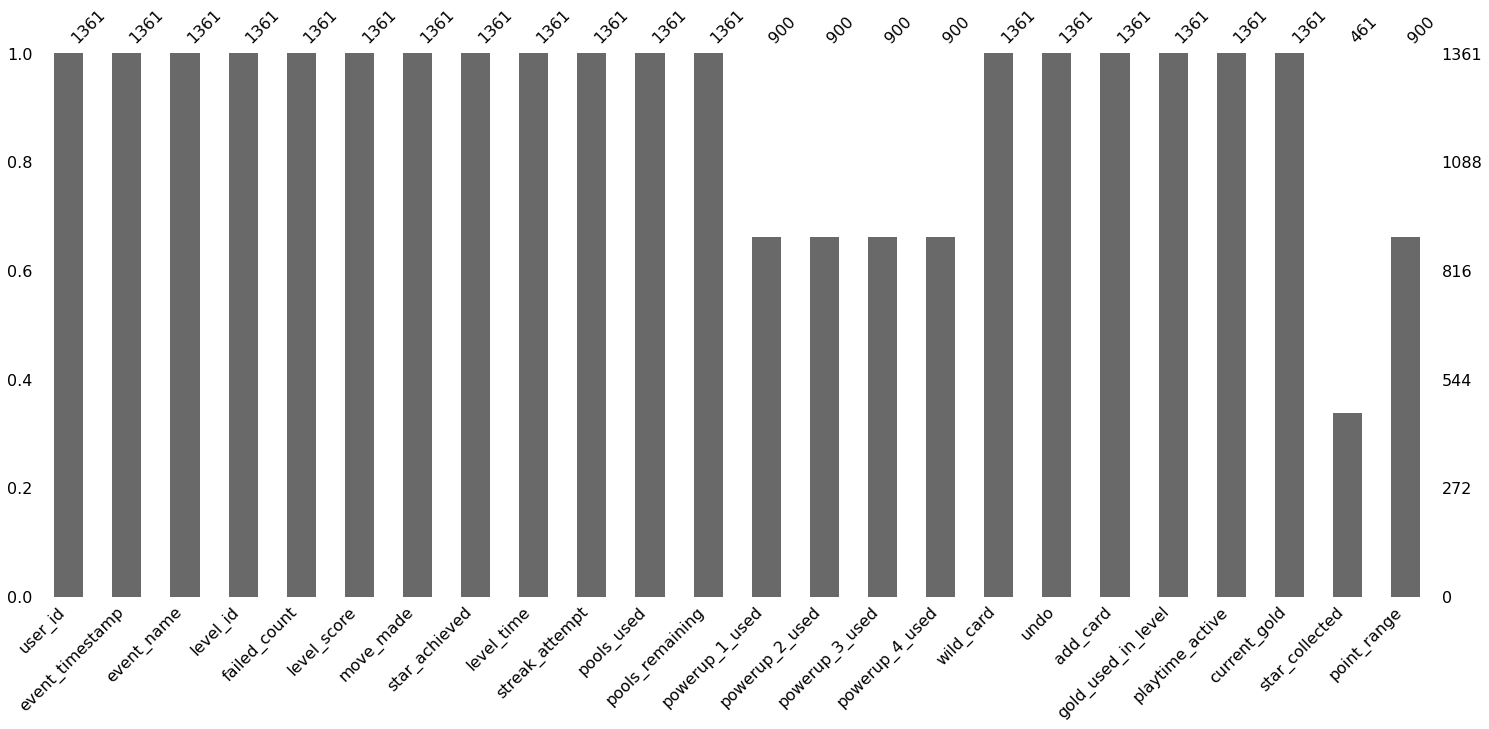

In [185]:
# Pada 'Data 2' ada 1361 kolom
import missingno as msno
msno.bar(df)


#Dari tabel dapat kita lihat pada powerup_1_used, powerup_2_used, powerup_3_used, powerup_4_used ada 461 kolom yang tidak ada data, serta star_collected ada 900 kolom yang tidak ada data dan point_range 461 kolom yang tidak ada data

Or

In [186]:
def explore(x):
    divider = "_____"
    print("\n {} \n".format((divider*20)))

    print("Dataframe Makeup \n")

    df.info()

    print("\n {} \n".format((divider*20)))

    print("Describe Statistic \n\n", x.describe().round(2))

    print("\n {} \n".format((divider*20)))

    print("Shape of Dataframe : {}".format(x.shape))

    print("\n {} \n".format((divider*20)))

    return

In [187]:
explore(df)


 ____________________________________________________________________________________________________ 

Dataframe Makeup 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1361 non-null   object        
 1   event_timestamp     1361 non-null   datetime64[ns]
 2   event_name          1361 non-null   object        
 3   level_id            1361 non-null   int64         
 4   failed_count        1361 non-null   int64         
 5   level_score         1361 non-null   int64         
 6   move_made           1361 non-null   int64         
 7   star_achieved       1361 non-null   int64         
 8   level_time          1361 non-null   int64         
 9   streak_attempt      1361 non-null   int64         
 10  pools_used          1361 non-null   int64         
 11  pools_remaining     1361 non-null   

Cleaning Data

In [188]:
def missing_data(x):
    return x.isna().sum()

In [189]:
missing_data(df)

user_id                 0
event_timestamp         0
event_name              0
level_id                0
failed_count            0
level_score             0
move_made               0
star_achieved           0
level_time              0
streak_attempt          0
pools_used              0
pools_remaining         0
powerup_1_used        461
powerup_2_used        461
powerup_3_used        461
powerup_4_used        461
wild_card               0
undo                    0
add_card                0
gold_used_in_level      0
playtime_active         0
current_gold            0
star_collected        900
point_range           461
dtype: int64

Munging and Wrangling data

In [190]:
def get_month(x) : return dt.datetime(x.year, x.month, x.day)

df['InvoiceMonth'] = df['event_timestamp'].apply(get_month)

grouping = df.groupby('level_id')['InvoiceMonth']

df['CohortMonth'] = grouping.transform('min')

In [191]:
df.tail()

,user_id,event_timestamp,event_name,level_id,failed_count,level_score,move_made,star_achieved,level_time,streak_attempt,pools_used,pools_remaining,powerup_1_used,powerup_2_used,powerup_3_used,powerup_4_used,wild_card,undo,add_card,gold_used_in_level,playtime_active,current_gold,star_collected,point_range,InvoiceMonth,CohortMonth
1356,EC8077B2-3397-449C-BE7C-A212F246BA32,2020-05-11 17:14:30,level_complete,141,3,206,39,3,29,3,13,3,0.0,0.0,0.0,0.0,0,1,0,430,323009,7805,NaN,8.0,2020-05-11,2020-05-11
1357,EC8077B2-3397-449C-BE7C-A212F246BA32,2020-05-11 17:16:03,level_complete,142,1,133,40,2,32,2,15,3,0.0,0.0,0.0,0.0,0,0,1,3250,323100,3074,NaN,8.0,2020-05-11,2020-05-11
1358,EC8077B2-3397-449C-BE7C-A212F246BA32,2020-05-11 17:16:45,level_complete,143,0,145,30,2,22,2,11,3,0.0,0.0,0.0,0.0,0,0,0,0,323140,3534,NaN,8.0,2020-05-11,2020-05-11
1359,EC8077B2-3397-449C-BE7C-A212F246BA32,2020-05-12 16:35:52,level_complete,144,5,124,47,2,41,1,15,5,0.0,0.0,0.0,0.0,0,1,0,430,323578,7484,NaN,8.0,2020-05-12,2020-05-12
1360,EC8077B2-3397-449C-BE7C-A212F246BA32,2020-05-12 16:38:05,level_complete,145,2,146,43,2,34,2,15,1,0.0,0.0,0.0,0.0,0,0,0,0,323708,4115,NaN,8.0,2020-05-12,2020-05-12


In [192]:
df['InvoiceMonth']

0      2020-04-15
1      2020-04-15
2      2020-04-15
3      2020-04-15
4      2020-04-15
5      2020-04-15
6      2020-04-15
7      2020-04-15
8      2020-04-15
9      2020-04-15
10     2020-04-15
11     2020-04-15
12     2020-04-15
13     2020-04-15
14     2020-04-15
15     2020-04-15
16     2020-04-15
17     2020-04-15
18     2020-04-15
19     2020-04-15
20     2020-04-15
21     2020-04-15
22     2020-04-15
23     2020-04-15
24     2020-04-15
25     2020-04-15
26     2020-04-15
27     2020-04-15
28     2020-04-15
29     2020-04-15
30     2020-04-15
31     2020-04-15
32     2020-04-15
33     2020-04-15
34     2020-04-15
35     2020-04-15
36     2020-04-15
37     2020-04-15
38     2020-04-15
39     2020-04-15
40     2020-04-15
41     2020-04-15
42     2020-04-15
43     2020-04-15
44     2020-04-15
45     2020-04-15
46     2020-04-15
47     2020-04-15
48     2020-04-15
49     2020-04-15
50     2020-04-15
51     2020-04-15
52     2020-04-15
53     2020-04-15
54     2020-04-15
55     202

In [193]:
df['CohortMonth'] = df.groupby('user_id')['InvoiceMonth'].transform('min')

In [194]:
df['CohortMonth']

0      2020-04-15
1      2020-04-15
2      2020-04-15
3      2020-04-15
4      2020-04-15
5      2020-04-15
6      2020-04-15
7      2020-04-15
8      2020-04-15
9      2020-04-15
10     2020-04-15
11     2020-04-15
12     2020-04-15
13     2020-04-15
14     2020-04-15
15     2020-04-15
16     2020-04-15
17     2020-04-15
18     2020-04-15
19     2020-04-15
20     2020-04-15
21     2020-04-15
22     2020-04-15
23     2020-04-15
24     2020-04-15
25     2020-04-15
26     2020-04-15
27     2020-04-15
28     2020-04-15
29     2020-04-15
30     2020-04-15
31     2020-04-15
32     2020-04-15
33     2020-04-15
34     2020-04-15
35     2020-04-15
36     2020-04-15
37     2020-04-15
38     2020-04-15
39     2020-04-15
40     2020-04-15
41     2020-04-15
42     2020-04-15
43     2020-04-15
44     2020-04-15
45     2020-04-15
46     2020-04-15
47     2020-04-15
48     2020-04-15
49     2020-04-15
50     2020-04-15
51     2020-04-15
52     2020-04-15
53     2020-04-15
54     2020-04-15
55     202

In [195]:
df.head()

,user_id,event_timestamp,event_name,level_id,failed_count,level_score,move_made,star_achieved,level_time,streak_attempt,pools_used,pools_remaining,powerup_1_used,powerup_2_used,powerup_3_used,powerup_4_used,wild_card,undo,add_card,gold_used_in_level,playtime_active,current_gold,star_collected,point_range,InvoiceMonth,CohortMonth
0,2CF33134-2B19-474C-A472-3742A13B77AF,2020-04-15 00:37:38,level_complete,1,0,100,24,3,15,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,36,21175,3.0,NaN,2020-04-15,2020-04-15
1,2CF33134-2B19-474C-A472-3742A13B77AF,2020-04-15 00:38:13,level_complete,2,0,25,15,3,18,0,2,0,NaN,NaN,NaN,NaN,0,0,0,0,71,21414,6.0,NaN,2020-04-15,2020-04-15
2,2CF33134-2B19-474C-A472-3742A13B77AF,2020-04-15 00:38:50,level_complete,3,0,100,25,3,27,2,7,5,NaN,NaN,NaN,NaN,0,0,0,0,111,21551,9.0,NaN,2020-04-15,2020-04-15
3,25C2812D-3F25-4ADB-93C1-E36AD8C29FF9,2020-04-15 01:36:58,level_complete,1,0,100,24,3,22,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,30,21175,3.0,NaN,2020-04-15,2020-04-15
4,25C2812D-3F25-4ADB-93C1-E36AD8C29FF9,2020-04-15 01:37:37,level_complete,2,0,25,15,3,17,0,2,0,NaN,NaN,NaN,NaN,0,0,0,0,70,21414,6.0,NaN,2020-04-15,2020-04-15


Create Cohort Analysis

In [196]:
def get_month(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.year
    return year, month, day

In [197]:
invoice_year, invoice_month, _ = get_month(df, 'InvoiceMonth')

In [198]:
invoice_month[:30]

0     4
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    4
19    4
20    4
21    4
22    4
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: InvoiceMonth, dtype: int64

In [199]:
invoice_year[:30]

0     2020
1     2020
2     2020
3     2020
4     2020
5     2020
6     2020
7     2020
8     2020
9     2020
10    2020
11    2020
12    2020
13    2020
14    2020
15    2020
16    2020
17    2020
18    2020
19    2020
20    2020
21    2020
22    2020
23    2020
24    2020
25    2020
26    2020
27    2020
28    2020
29    2020
Name: InvoiceMonth, dtype: int64

In [200]:
cohort_year, cohort_month, _ = get_date(df, 'CohortMonth')

In [201]:
cohort_month[:30]

0     4
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    4
19    4
20    4
21    4
22    4
23    4
24    4
25    4
26    4
27    4
28    4
29    4
Name: CohortMonth, dtype: int64

In [202]:
cohort_year[:30]

0     2020
1     2020
2     2020
3     2020
4     2020
5     2020
6     2020
7     2020
8     2020
9     2020
10    2020
11    2020
12    2020
13    2020
14    2020
15    2020
16    2020
17    2020
18    2020
19    2020
20    2020
21    2020
22    2020
23    2020
24    2020
25    2020
26    2020
27    2020
28    2020
29    2020
Name: CohortMonth, dtype: int64

In [203]:
year_diff = invoice_year - cohort_year

In [204]:
year_diff.tail()

1356    0
1357    0
1358    0
1359    0
1360    0
dtype: int64

In [205]:
month_diff = invoice_month - cohort_month

In [206]:
month_diff

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [207]:
df['CohortIndex'] = year_diff*12 + month_diff + 1

In [208]:
df['CohortIndex'].tail()

1356    2
1357    2
1358    2
1359    2
1360    2
Name: CohortIndex, dtype: int64

Cohort Analysis 1 

In [209]:
cohort_df = df.groupby(
    ['CohortMonth', 'CohortIndex'])['user_id'].apply(pd.Series.nunique).reset_index()

In [210]:
cohort_count = cohort_df.pivot_table(index = 'CohortMonth',
                                    columns = 'CohortIndex',
                                    values = 'user_id')

In [211]:
cohort_count

CohortIndex,1,2
CohortMonth,,
2020-04-15,14.0,3.0
2020-04-16,4.0,NaN
2020-04-18,1.0,NaN
2020-04-20,13.0,NaN
2020-04-22,2.0,1.0
2020-04-23,1.0,1.0
2020-04-27,1.0,NaN
2020-04-28,1.0,1.0
2020-04-29,1.0,1.0


Create retention as a percentage

In [214]:
cohort_size = cohort_count.iloc[:, 0]
retention = cohort_count.divide(cohort_size, axis=0)
retention.round(3)

CohortIndex,1,2
CohortMonth,,
2020-04-15,1.0,0.214
2020-04-16,1.0,NaN
2020-04-18,1.0,NaN
2020-04-20,1.0,NaN
2020-04-22,1.0,0.500
2020-04-23,1.0,1.000
2020-04-27,1.0,NaN
2020-04-28,1.0,1.000
2020-04-29,1.0,1.000


Create cohort heatmaps

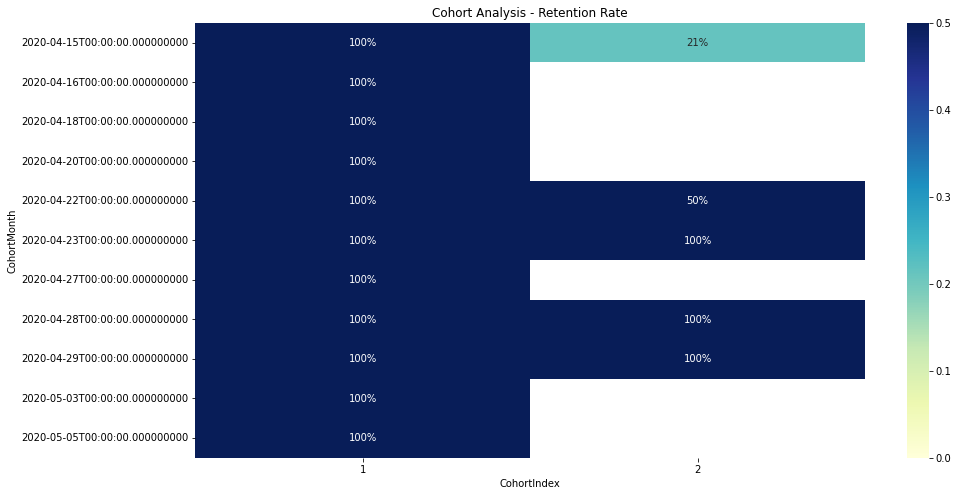

In [215]:
plt.figure(figsize=(15,8))
plt.title('Cohort Analysis - Retention Rate')   
sns.heatmap(data = retention,
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'YlGnBu' )
plt.show()